In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [325]:
file_name = "Zoisite.csv"
zoisite = pd.read_csv(file_name, delimiter=';')
zoisite.head()

,Temperature (ºC),a(A),b(A),c(A),V(A3)
0,25,16.210(2),5.5552(8),10.041(1),904.2(2)
1,70,16.214(2),5.5582(8),10.048(1),905.5(2)
2,120,16.213(2),5.5644(8),10.053(1),906.9(2)
3,170,16.210(2),5.5692(7),10.067(1),908.8(2)
4,220,16.209(2),5.5749(7),10.077(1),910.6(2)


In [326]:
for i in list(zoisite)[1:]:
        zoisite[i + '_std'] = zoisite[i].str.extract('.*\((.*)\).*').astype(float)/(10**(zoisite[i].iloc[0][::-1].find('.')-3))
        zoisite[i] = zoisite[i].str.replace(r"\(.*\)","", regex=True).astype(float)

In [292]:
len(zoisite)

15

In [327]:
zoisite['V/V0'] = zoisite['V(A3)']/zoisite['V(A3)'].iloc[0]
zoisite['V/V0_std'] = 2*(zoisite['V(A3)']/zoisite['V(A3)'].iloc[0]*(zoisite['V(A3)_std']/zoisite['V(A3)']+zoisite['V(A3)_std'].iloc[0]/zoisite['V(A3)'].iloc[0]))
zoisite

,Temperature (ºC),a(A),b(A),c(A),V(A3),a(A)_std,b(A)_std,c(A)_std,V(A3)_std,V/V0,V/V0_std
0,25,16.210,5.5552,10.041,904.2,0.002,0.0008,0.001,0.2,1.000000,0.000885
1,70,16.214,5.5582,10.048,905.5,0.002,0.0008,0.001,0.2,1.001438,0.000885
2,120,16.213,5.5644,10.053,906.9,0.002,0.0008,0.001,0.2,1.002986,0.000886
3,170,16.210,5.5692,10.067,908.8,0.002,0.0007,0.001,0.2,1.005087,0.000887
4,220,16.209,5.5749,10.077,910.6,0.002,0.0007,0.001,0.2,1.007078,0.000888
5,270,16.211,5.5819,10.088,912.9,0.002,0.0006,0.001,0.1,1.009622,0.000668
6,320,16.209,5.5861,10.098,914.4,0.002,0.0006,0.001,0.1,1.011281,0.000669
7,370,16.197,5.5897,10.109,915.3,0.004,0.0010,0.002,0.2,1.012276,0.000890
8,420,16.206,5.5962,10.120,917.8,0.002,0.0008,0.001,0.2,1.015041,0.000891
9,470,16.207,5.6016,10.131,919.7,0.003,0.0008,0.001,0.2,1.017142,0.000892


In [368]:
zoisite.to_csv('data_zoisite.csv')

<Axes: xlabel='Temperature (ºC)', ylabel='V/V0'>

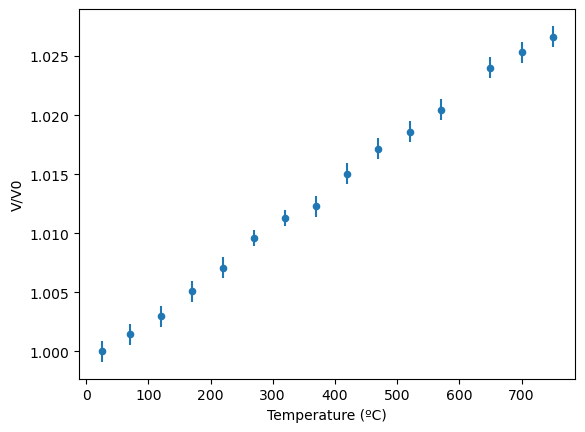

In [328]:
zoisite.plot.scatter('Temperature (ºC)', 'V/V0', yerr = 'V/V0_std')

In [117]:
from scipy import optimize

In [358]:
ydata = zoisite['V/V0']
xdata = zoisite['Temperature (ºC)'] + 273
#xdata = np.linspace(298, 1073, 20)
stdv  = zoisite['V/V0_std']
def f(T, a0):
    return 1 + a0*(T-298) - 2*10*a0*(np.sqrt(T) - np.sqrt(298)) 

def g(a0):
    return ydata - f(xdata, a0)

In [369]:
beta_start = (1)
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata, sigma = stdv)
beta_opt, beta_cov

(array([6.62917869e-05]), array([[1.03048101e-12]]))

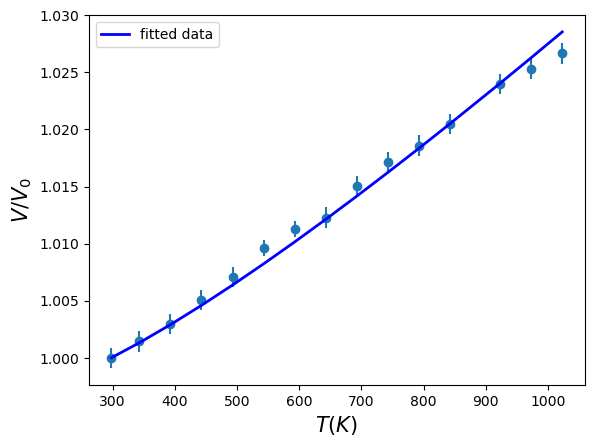

In [360]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.errorbar(xdata, ydata, yerr = stdv, ls='None')
ax.plot(xdata, f(xdata, beta_opt), 'b', lw=2, label='fitted data')
#ax.set_xlim(0, 5)
ax.set_xlabel(r"$T(K)$", fontsize=15)
ax.set_ylabel(r"$V/V_0$", fontsize=15)
ax.legend()

## Using linear expression

In [365]:
def f2(T, a0):
    return 1 + a0*(T-298) 

beta_opt, beta_cov = optimize.curve_fit(f2, xdata, ydata, sigma = stdv)
beta_opt,

(array([3.75733695e-05]),)

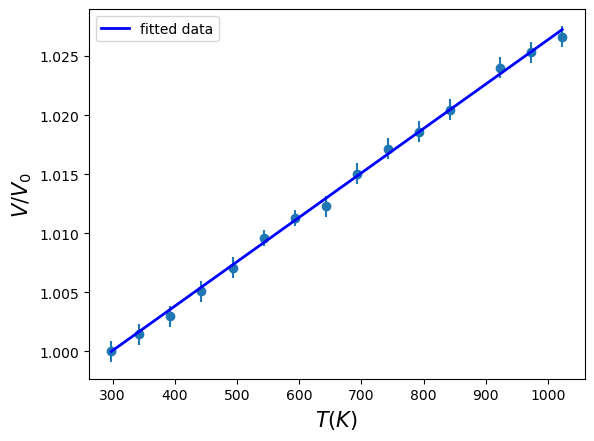

In [363]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.errorbar(xdata, ydata, yerr = stdv, ls='None')
ax.plot(xdata, f2(xdata, beta_opt), 'b', lw=2, label='fitted data')
#ax.set_xlim(0, 5)
ax.set_xlabel(r"$T(K)$", fontsize=15)
ax.set_ylabel(r"$V/V_0$", fontsize=15)
ax.legend()

3

In [288]:
file_name = "Clinozoisite.csv"
phase = pd.read_csv(file_name, delimiter=';')
phase.head()

,Temperature (ºC),a(A),b(A),c(A),beta (º),V(A3)
0,25,8.861(3),5.583(1),10.141(3),115.46(2),452.9(1)
1,100,8.860(3),5.590(1),10.159(3),115.50(2),454.1(1)
2,200,8.863(3),5.596(2),10.172(3),115.49(2),455.4(2)
3,300,8.873(3),5.604(1),10.185(3),115.56(2),456.9(1)
4,400,8.880(2),5.612(1),10.195(2),115.64(1),458.0(1)


In [289]:
for i in list(phase)[1:]:
        phase[i + '_std'] = phase[i].str.extract('.*\((.*)\).*').astype(float)/(10**(phase[i].iloc[0][::-1].find('.')-3))
        phase[i] = phase[i].str.replace(r"\(.*\)","", regex=True).astype(float)


phase['V/V0'] = phase['V(A3)']/phase['V(A3)'].iloc[0]
phase['V/V0_std'] = 2*(905.5/904.2*(0.2/905.5+0.2/904.2))
phase

,Temperature (ºC),a(A),b(A),c(A),beta (º),V(A3),a(A)_std,b(A)_std,c(A)_std,beta (º)_std,V(A3)_std,V/V0,V/V0_std
0,25,8.861,5.583,10.141,115.46,452.9,0.003,0.001,0.003,0.02,0.1,1.000000,0.000885
1,100,8.860,5.590,10.159,115.50,454.1,0.003,0.001,0.003,0.02,0.1,1.002650,0.000885
2,200,8.863,5.596,10.172,115.49,455.4,0.003,0.002,0.003,0.02,0.2,1.005520,0.000885
3,300,8.873,5.604,10.185,115.56,456.9,0.003,0.001,0.003,0.02,0.1,1.008832,0.000885
4,400,8.880,5.612,10.195,115.64,458.0,0.002,0.001,0.002,0.01,0.1,1.011261,0.000885
5,500,8.881,5.619,10.210,115.67,459.2,0.002,0.001,0.002,0.01,0.1,1.013910,0.000885
6,600,8.881,5.625,10.221,115.66,460.3,0.002,0.001,0.002,0.01,0.1,1.016339,0.000885
7,650,8.884,5.630,10.235,115.68,461.3,0.002,0.001,0.002,0.02,0.1,1.018547,0.000885
8,700,8.883,5.633,10.239,115.68,461.7,0.002,0.001,0.002,0.01,0.1,1.019430,0.000885
9,800,8.893,5.639,10.249,115.72,463.0,0.002,0.001,0.002,0.01,0.1,1.022301,0.000885


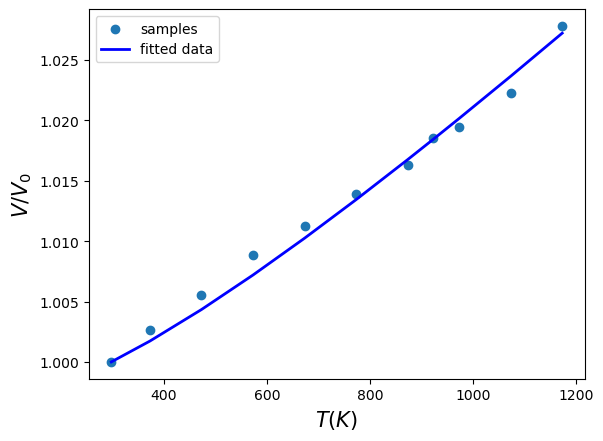

In [290]:
ydata = phase['V/V0']
xdata = phase['Temperature (ºC)'] + 273
def f(T, a0):
    return 1 + a0*(T-298) - 2*10*a0*(np.sqrt(T) - np.sqrt(298)) 

def g(a0):
    return ydata - f(xdata, a0)

beta_start = (1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, f(xdata, beta_opt), 'b', lw=2, label='fitted data')
#ax.set_xlim(0, 5)
ax.set_xlabel(r"$T(K)$", fontsize=15)
ax.set_ylabel(r"$V/V_0$", fontsize=15)
ax.legend()

In [291]:
beta_opt

array([5.08556499e-05])